In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('D:/APU/TXSA-CT107-3-3/LAB/LAB 8/opinion_dataset.csv')
print(data.head())

                                            Opinions Sentiment
0                                       Personal sms  Positive
1  Banners at high density population locations l...  Positive
2                     Opportunity to receive bonuses  Positive
3                          Street advertising boards  Positive
4                                    Black happines   Negative



Target value counts ~~~~~~~~
Positive    87
Negative    13
Name: Sentiment, dtype: int64

Target value visualisation ~~~~~~~~


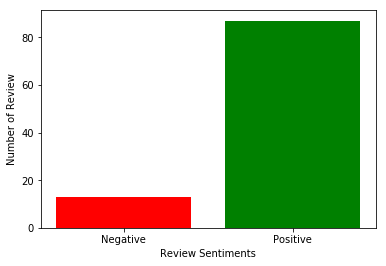

array(['Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positi

In [2]:
# Target variable visualisation
print("\nTarget value counts ~~~~~~~~")
print(data['Sentiment'].value_counts())
print("\nTarget value visualisation ~~~~~~~~")
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Opinions'], color=('r','g'))
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

X = data['Opinions'].values
X
y = data['Sentiment'].values
y

In [3]:
# Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1), tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Opinions'])

In [4]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [5]:
# MultinomialNB from Sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
MNB_classifier = MultinomialNB().fit(X_train, y_train)
predicted_MNB = MNB_classifier.predict(X_test)
print("Accuracy of MNB Classifier:", metrics.accuracy_score(y_test, predicted_MNB))
print("\nClassification Report:\n", metrics.classification_report(y_test, predicted_MNB))

Accuracy of MNB Classifier: 0.9

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.93      0.96      0.95        28

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30



In [6]:
#  Confusion Matrix for MultinomialNB
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predicted_MNB)
print("~~~~~~~~ Confusion Matrix ~~~~~~~~")
print(CM)

~~~~~~~~ Confusion Matrix ~~~~~~~~
[[ 0  2]
 [ 1 27]]


In [7]:
# ~~~~~~~~~~~~~~~ CROSS VALIDATION ~~~~~~~~~~~~~~~
print("\n~~~~~~~~ Cross Validation using cross_validate function ~~~~~~~~")
from sklearn.model_selection import cross_validate
MNB_classifier_CV1 = MultinomialNB().fit(X_train, y_train)
cv_score_1 = cross_validate(MNB_classifier_CV1, X_train, y_train, cv=5)
sorted(cv_score_1.keys())
cv_score_1['test_score']
print("Accuracy: %0.2f" % (cv_score_1['test_score'].mean()))


~~~~~~~~ Cross Validation using cross_validate function ~~~~~~~~
Accuracy: 0.79


In [8]:
print("\n~~~~~~~~ Cross Validation using cross_val_score function ~~~~~~~~")    
from sklearn.model_selection import cross_val_score
MNB_classifier_CV2 = MultinomialNB().fit(X_train, y_train)
cv_score_2 = cross_val_score(MNB_classifier_CV2, X_train, y_train, cv=5)
print("Accuracy: %0.2f" % (cv_score_2.mean()))


~~~~~~~~ Cross Validation using cross_val_score function ~~~~~~~~
Accuracy: 0.79
